## Assignment

Import necessary library

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [ ]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


Read the data

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [ ]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [ ]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [ ]:
df_can['Total'] = df_can.sum(axis=1)

**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


In [ ]:
df_can.set_index('Country', inplace=True)

In [ ]:
df_can.index.name = None

In [ ]:
df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980, 2014)))
print(df_can)

               Continent              Region  ...  2013  Total
Afghanistan         Asia       Southern Asia  ...  2004  58639
Albania           Europe     Southern Europe  ...   603  15699
Algeria           Africa     Northern Africa  ...  4331  69439
American Samoa   Oceania           Polynesia  ...     0      6
Andorra           Europe     Southern Europe  ...     1     15
...                  ...                 ...  ...   ...    ...
Viet Nam            Asia  South-Eastern Asia  ...  2112  97146
Western Sahara    Africa     Northern Africa  ...     0      2
Yemen               Asia        Western Asia  ...   217   2985
Zambia            Africa      Eastern Africa  ...    59   1677
Zimbabwe          Africa      Eastern Africa  ...   407   8598

[195 rows x 38 columns]


Step 1: Get the data set for China and India, and display dataframe.

In [ ]:
### type your answer here
df_inchi = df_can.loc[['India', 'China'], years].transpose()
print(df_inchi)

      India  China
1980   8880   5123
1981   8670   6682
1982   8147   3308
1983   7338   1863
1984   5704   1527
1985   4211   1816
1986   7150   1960
1987  10189   2643
1988  11522   2758
1989  10343   4323
1990  12041   8076
1991  13734  14255
1992  13673  10846
1993  21496   9817
1994  18620  13128
1995  18489  14398
1996  23859  19415
1997  22268  20475
1998  17241  21049
1999  18974  30069
2000  28572  35529
2001  31223  36434
2002  31889  31961
2003  27155  36439
2004  28235  36619
2005  36210  42584
2006  33848  33518
2007  28742  27642
2008  28261  30037
2009  29456  29622
2010  34235  30391
2011  27509  28502
2012  30933  33024
2013  33087  34129


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

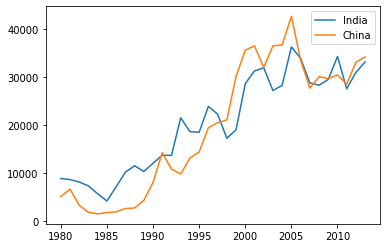

In [ ]:
### type your answer here
df_inchi.plot()
plt.show()

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [ ]:
### type your answer here
temp = df_can.nlargest(5,['Total'])
biggest5 = temp[years].transpose()
print(biggest5)


      India  China  ...  Philippines  Pakistan
1980   8880   5123  ...         6051       978
1981   8670   6682  ...         5921       972
1982   8147   3308  ...         5249      1201
1983   7338   1863  ...         4562       900
1984   5704   1527  ...         3801       668
1985   4211   1816  ...         3150       514
1986   7150   1960  ...         4166       691
1987  10189   2643  ...         7360      1072
1988  11522   2758  ...         8639      1334
1989  10343   4323  ...        11865      2261
1990  12041   8076  ...        12509      2470
1991  13734  14255  ...        12718      3079
1992  13673  10846  ...        13670      4071
1993  21496   9817  ...        20479      4777
1994  18620  13128  ...        19532      4666
1995  18489  14398  ...        15864      4994
1996  23859  19415  ...        13692      9125
1997  22268  20475  ...        11549     13073
1998  17241  21049  ...         8735      9068
1999  18974  30069  ...         9734      9979
2000  28572  

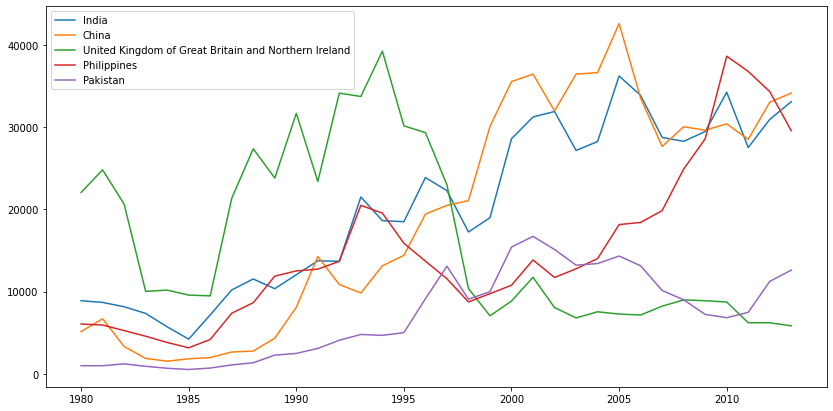

In [ ]:
### type your answer here
biggest5.plot(figsize=(14, 7))
plt.show()



**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

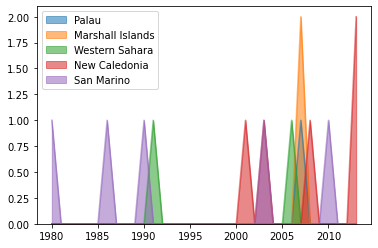

In [ ]:
### type your answer here
temp = df_can.nsmallest(5,['Total'])
smallest5 = temp[years].transpose()
smallest5.plot.area(stacked=False,alpha=0.55)
plt.show()



**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [ ]:
### type your answer here

q4 = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
print(q4)


      Greece  Albania  Bulgaria
1980    1065        1        24
1981     953        0        20
1982     897        0        12
1983     633        0        33
1984     580        0        11
1985     584        0        24
1986     547        1        33
1987     765        2        52
1988     564        2        43
1989     773        3        85
1990     538        3       172
1991     592       21       611
1992     492       56      1116
1993     445       96       965
1994     275       71       687
1995     220       63       762
1996     221      113       825
1997     190      307       732
1998     141      574       779
1999     149     1264       832
2000     150     1816      1172
2001     135     1602      1283
2002     107     1021      1517
2003     117      853      1507
2004     120     1450      2022
2005     100     1223      1738
2006      74      856      1419
2007     110      702      1172
2008     107      560       994
2009     119      716       784
2010    

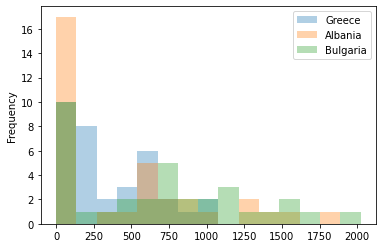

In [ ]:
q4.plot(kind='hist',stacked=False,alpha=0.35,bins=15)
plt.show()

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [ ]:
### type your answer here
temp = df_can.nlargest(15,['Total'])
biggest15 = temp[years].transpose()
print(biggest15)




      India  China  ...  Viet Nam  Romania
1980   8880   5123  ...      1191      375
1981   8670   6682  ...      1829      438
1982   8147   3308  ...      2162      583
1983   7338   1863  ...      3404      543
1984   5704   1527  ...      7583      524
1985   4211   1816  ...      5907      604
1986   7150   1960  ...      2741      656
1987  10189   2643  ...      1406     1202
1988  11522   2758  ...      1411     1106
1989  10343   4323  ...      3004     1582
1990  12041   8076  ...      3801     2252
1991  13734  14255  ...      5870     2337
1992  13673  10846  ...      5416     3147
1993  21496   9817  ...      6547     3676
1994  18620  13128  ...      5105     3495
1995  18489  14398  ...      3723     4279
1996  23859  19415  ...      2462     3909
1997  22268  20475  ...      1752     3993
1998  17241  21049  ...      1631     3033
1999  18974  30069  ...      1419     3538
2000  28572  35529  ...      1803     4539
2001  31223  36434  ...      2117     5652
2002  31889

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
   3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

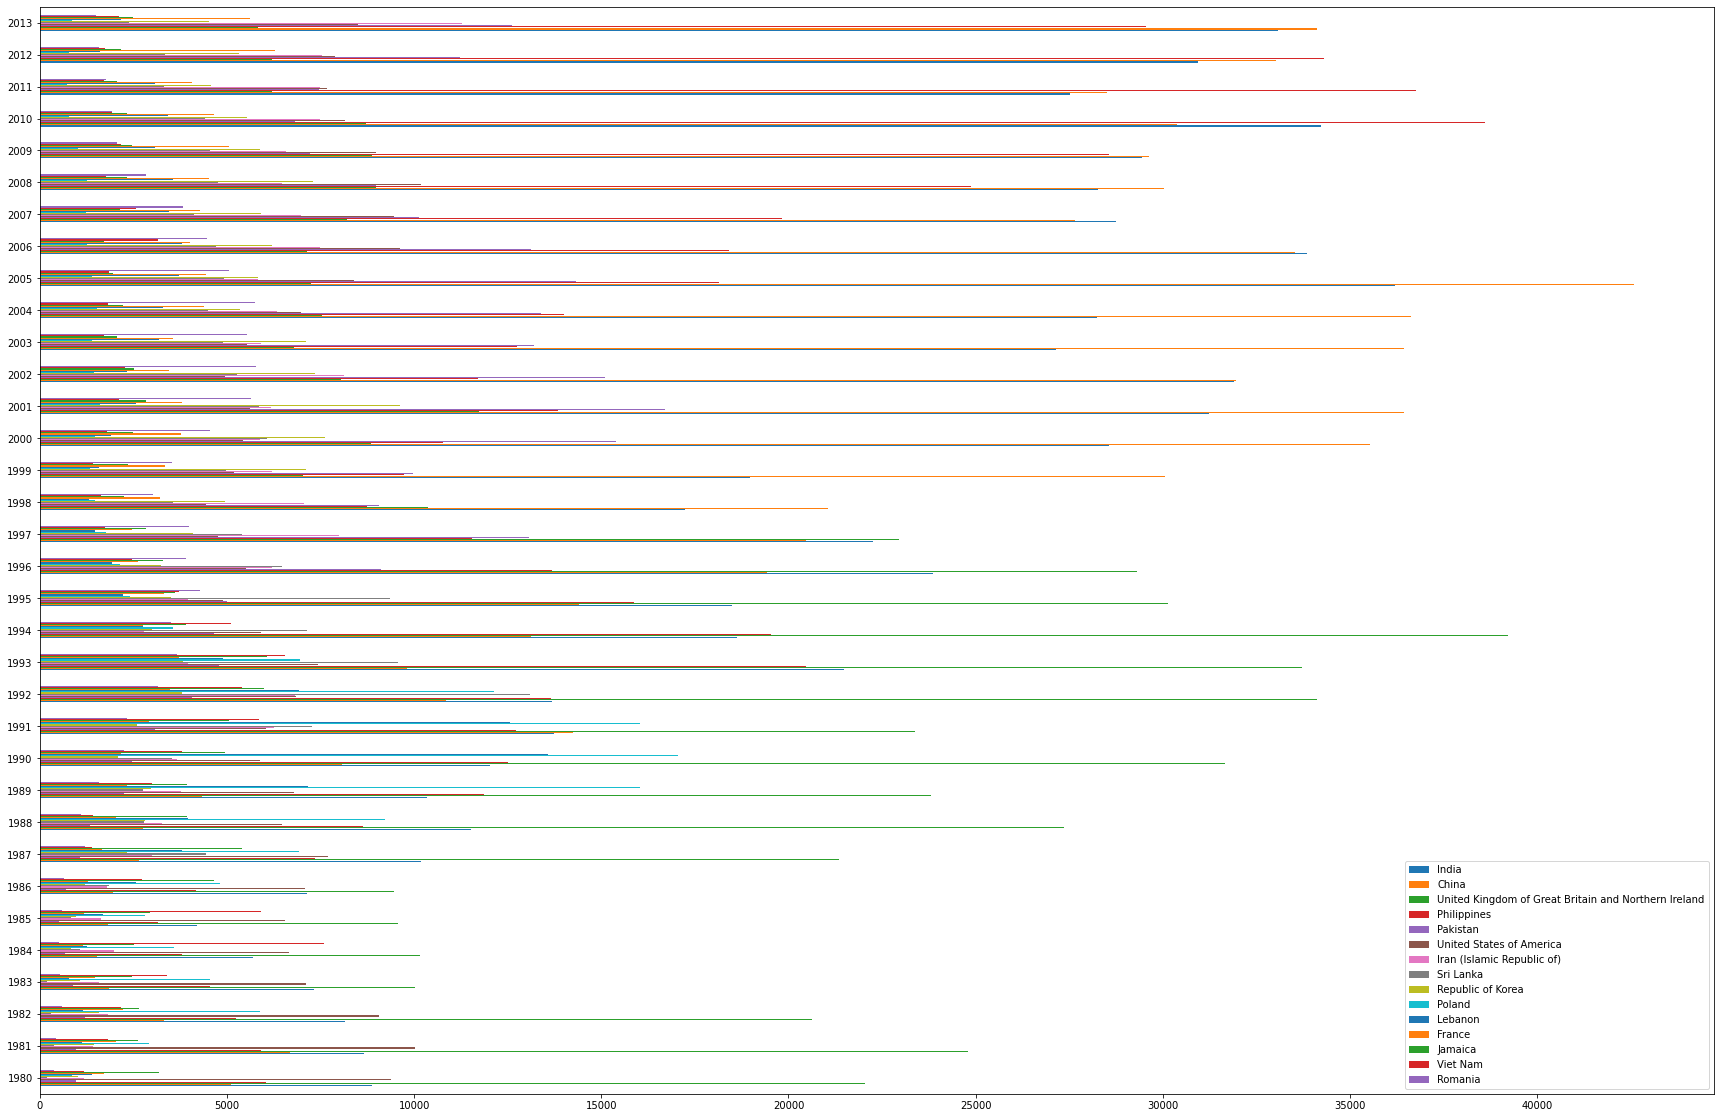

In [ ]:
### type your answer here
biggest15.plot.barh(figsize=(30,20))

plt.show()



# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).

In [ ]:
import xmlrpc